# Impact of Discounted ARR on Churn Rate for Product

# Importing Libaries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 

In [56]:
df_product = pd.read_csv("../staging/data_set/cleaned_product.csv")
df_expansion = pd.read_csv("../staging/data_set/cleaned_expansion.csv")

# Formatting Date

In [57]:
df_product["score_date"] = pd.to_datetime(df_product["score_date"], errors="coerce")
df_product["year_week"] = df_product["score_date"].dt.to_period("W").astype(str)

df_expansion["score_date"] = pd.to_datetime(df_expansion["score_date"], errors="coerce")
df_expansion["year_week"] = df_expansion["score_date"].dt.to_period("W").astype(str)


# Merge Product and Expansion data


In [58]:
df_merged = pd.merge(df_product, df_expansion, on=["id","year_week"], how="inner")



# Calculate churn based on Discount arr

In [59]:
weekly_churn = df_merged.groupby("discount_arr_usd")["product_churn"].sum().reset_index()

# Visualization

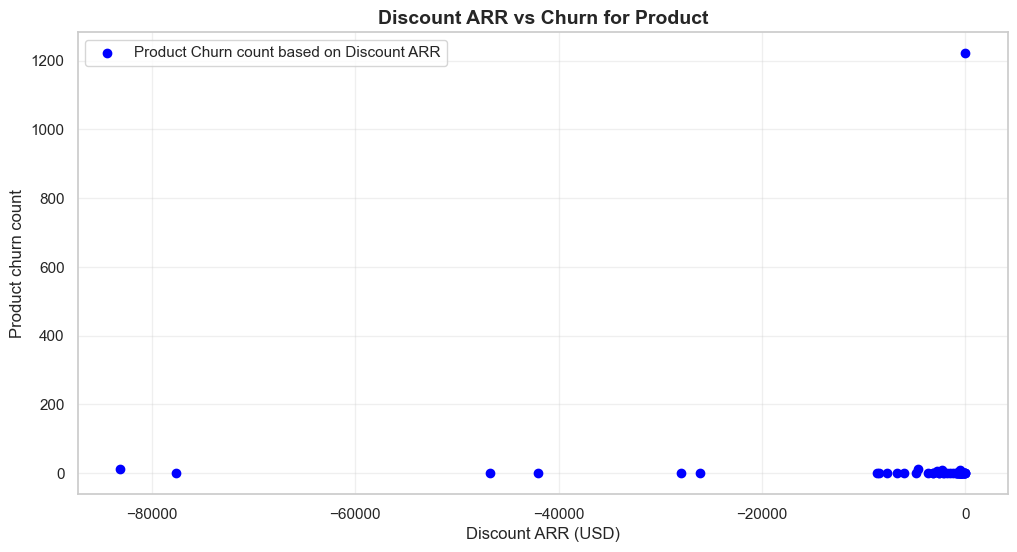

In [60]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.scatter(weekly_churn["discount_arr_usd"],weekly_churn["product_churn"] , label="Product Churn count based on Discount ARR", color="blue")

plt.title("Discount ARR vs Churn for Product", fontsize=14, fontweight="bold")
plt.xlabel("Discount ARR (USD)", fontsize=12)
plt.ylabel("Product churn count", fontsize=12)

plt.legend()
plt.grid(alpha=0.3)

plt.show()